In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Data Preparation

In [2]:
DATA_PATH = "../../data/"
#TARGET_CITY = str(input("Which City You want to draw network?"))

In [4]:
data = pd.read_excel(f"{DATA_PATH}df_filter_dummy_pohang.xlsx")

In [38]:
# data = pd.read_pickle(f"{DATA_PATH}df_filter_dummy_{TARGET_CITY}.pkl")

In [3]:
#data = pd.read_pickle("../../data/pkl/merged_filtered_0630.pkl")

In [5]:
keyword_set = data['filter_keyword']

In [41]:
# keyword_set

2917491    {조성, 주민, 관광, 지역, 주민들, 건설}
2917492                {실업, 지자체, 지역}
2917493                     {주민, 지역}
2917494                       {환경오염}
2917495                         {지역}
                     ...            
2952569                         {도시}
2952570                    {발생, 주민들}
2952571                         {주민}
2952572                         {주민}
2952573                         {사업}
Name: filter_keyword, Length: 35083, dtype: object

In [6]:
key_set = []
for item in keyword_set:
    item = str(item)
    item = item.replace("{", "")
    item = item.replace("}", "")
    item = item.replace("'", "")
    splited = item.split(",")
    temp = []
    for tok in splited:
        temp.append(tok.replace(" ", ""))
    key_set.append(temp)

### Apriori algorithm

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [8]:
te = TransactionEncoder()
te_result = te.fit(key_set).transform(key_set)

In [9]:
key_df = pd.DataFrame(te_result, columns=te.columns_)

In [10]:
itemset = apriori(key_df, min_support=0.001, use_colnames=True)

In [47]:
for idx, item in enumerate(itemset.itemsets):
    if len(item) == 3:
        idx
        break
itemset_2gram = itemset[:idx]

In [14]:
# itemset_2gram

,support,itemsets
0,0.036047,(감소)
1,0.140734,(개최)
2,0.072415,(건설)
3,0.002644,(경제활동)
4,0.004348,(고령화)
...,...,...
488,0.001921,"(체험, 혁신)"
489,0.005164,"(체험, 활성화)"
490,0.001204,"(혁신, 피해)"
491,0.001563,"(활성화, 피해)"


In [48]:
from mlxtend.frequent_patterns import association_rules
apriori_result = association_rules(itemset_2gram, metric="lift", min_threshold=1)

In [69]:
apriori_result.to_excel(f"./result/{TARGET_CITY}_apriori_result.xlsx")

In [49]:
network_data = apriori_result[['antecedents', 'consequents', 'lift']]

In [51]:
# network_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(건설),(감소),0.083431,0.042471,0.004532,0.054322,1.279042,0.000989,1.012532
1,(감소),(건설),0.042471,0.083431,0.004532,0.106711,1.279042,0.000989,1.026062
2,(고령화),(감소),0.003107,0.042471,0.001026,0.330275,7.776541,0.000894,1.429736
3,(감소),(고령화),0.042471,0.003107,0.001026,0.024161,7.776541,0.000894,1.021575
4,(관광),(감소),0.130662,0.042471,0.006356,0.048647,1.145436,0.000807,1.006493
...,...,...,...,...,...,...,...,...,...
735,(혁신),(지자체),0.011002,0.062537,0.002594,0.235751,3.769764,0.001906,1.226646
736,(활성화),(지자체),0.041160,0.062537,0.005330,0.129501,2.070783,0.002756,1.076926
737,(지자체),(활성화),0.062537,0.041160,0.005330,0.085232,2.070783,0.002756,1.048179
738,(활성화),(체험),0.041160,0.085711,0.004931,0.119806,1.397791,0.001403,1.038736


### Visualize network

In [52]:
import matplotlib.pyplot as plt
import networkx as nx

In [1]:
# import matplotlib
# import matplotlib.font_manager

# [f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

Duplicate key in file PosixPath('/home/mglee/.conda/envs/svmglee/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  NanumGothic')


['NanumGothic',
 'NanumSquare',
 'NanumGothicCoding',
 'Nanum Pen Script',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothic',
 'NanumGothic',
 'Nanum Brush Script',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumBarunpen',
 'NanumMyeongjo',
 'NanumGothic Eco',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquare',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumGothic Eco',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'NanumMyeongjo Eco',
 'NanumBarunpen',
 'NanumSquare',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunpen',
 'NanumGothic Eco',
 'NanumMyeongjo Eco',
 'NanumMyeongjo',
 'NanumMyeongjo Eco',
 'NanumMyeongjo',
 'Nanum Pen Script',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumGothic',
 'Nanum Brush Script',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumSquare',
 'NanumSquareRound',

In [53]:
# np.mean(network_data['lift'])

1.922103632741239

In [54]:
node_lst = []
for node in network_data['antecedents']:
    node_lst.append(', '.join(list(node)))

In [55]:
graph = nx.Graph()
#graph.add_nodes_from(node_lst)
for i in range(len(network_data)):
    a, b, c = network_data.iloc[i, :]
    a = ', '.join(list(a))
    b = ', '.join(list(b))
    if c > 1:
        graph.add_edge(a, b, weight = round(c,3))
    else:
        pass

In [67]:
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)

import matplotlib.font_manager as fm 
from matplotlib import rc
font_name = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()

In [26]:

# rc('font', family=font_name)
# print(font_name)

NanumGothic


In [57]:
import matplotlib

matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [58]:
labels = nx.get_edge_attributes(graph,'weight')

In [59]:
edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

In [1]:
pd.DataFrame(weights).quantile([0.99])

NameError: name 'pd' is not defined

In [63]:
weights = list(weights)
weights[np.argmax(weights)] = 10

In [64]:
# max(weights)

10

In [65]:
def weights_multiple(weights, n):
    lst = []
    for w in weights:
        lst.append(w * n)
    return lst

In [66]:
weights_m = weights_multiple(weights, 1)

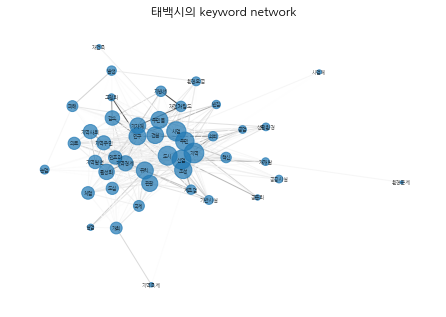

In [68]:
n_size = dict(graph.degree)
pos = nx.shell_layout(graph)

nx.draw(graph, nodelist=n_size.keys(), node_size=[v * 10 for v in n_size.values()], 
        with_labels = True, font_family = font_name, font_size = 5,
       alpha = 0.7,
       edgelist=edges, edge_color=weights_m, width=1, edge_cmap=plt.cm.binary)

plt.title("태백시의 keyword network")
#plt.show(block=False)
plt.savefig("태백시.png", format="PNG", dpi = 1000)